<a href="https://colab.research.google.com/github/sheki018/mini-project/blob/main/MiniProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INSTALL AND IMPORT MODULES**

In [77]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from Crypto.Cipher import DES
from Crypto import Random
import base64

## **KEY GENERATION**

In [78]:
def gen_key():
    private_key = rsa.generate_private_key(
        public_exponent=65537, key_size=2048, backend=default_backend())
    
    public_key = private_key.public_key()
    return private_key, public_key


def save_pvkey(pk, filename):
    pem = pk.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.TraditionalOpenSSL,
        encryption_algorithm=serialization.NoEncryption()
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)
        
def save_pukey(pk, filename):        
    pem = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)

private_key, public_key = gen_key()

save_pvkey(private_key, 'aes_private_key')
save_pvkey(private_key, 'des_private_key')
save_pukey(public_key, 'aes_public_key')
save_pukey(public_key, 'des_public_key')
print("private key and public key generated.")

private key and public key generated.


## **SENDER END**

In [79]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic
from Crypto.Cipher import DES
from Crypto import Random
import base64

# **DNA CRYPTO**

In [80]:
DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":","0","1","2","3","4","5","6","7","8","9"],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

DNA_df = pd.DataFrame.from_dict(DNA_data)
#print(DNA_df)

message = input("Please enter your message: ")

#Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm
DNA_crypto_message = ""
word = message.upper()


for i in word:
    DNA_crypto_message+= str(DNA_df.loc[ DNA_df['words'] == i , 'DNA_code' ].iloc[0])
    
print(DNA_crypto_message)

TCTCGATCCGGCACCGCTACCTTTGGCGGATCATTTGGCACCTCCGGCTCTTTGGGCACGTCGACCTTTGGCTCTTTGGGCTCAACCGCTACCTCCCGATGCGGCTCGACCCCAATGTCATTCCGCTTGCGATTCGGCACCGCTACCAGAGATGCGGATTAGGCGGCGAGATCGACCACGACGTCTACCGCTACCTAGAGATTAAGAACAAGGGCAGAGGCGGCAGCGTCGACCTCCGGCTTGATGGTTCGATGCACCCGCATGACGTTCGGATCAAAAACCGCTACCTTGATGCGACCAGGCTTCGGCACGTCGACCTTGATGCGATTTTCTGGAACGATGACGACCGCTACCCCATCAGGAAAGGGCTCTACCCGATCATCC


# **AES CRYPTO**

In [81]:
helloo = message

#block size =16
#AES-128
BS = 16
#data should be a multiple of 16 bytes n length. Pad the buffer if it is not and include the size of the data at the beginning of the output.
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        #generate key
        self.key = bytes(key, 'utf-8')

    def encrypt( self, raw ):
        raw = pad(raw)
        #initialization vector - 16 bytes
        iv = Random.new().read( AES.block_size )
        #MODE_CBC - cipher-block chaining - each plaintext block gets XOR-ed with the previous ciphertext prior to encryption
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        return base64.b64encode( iv + cipher.encrypt( raw ) )

cipher = AESCipher('LKHlhb899Y09olUi')
AES_encrypted_message = cipher.encrypt(DNA_crypto_message)

print(AES_encrypted_message)

b'FcRaopIj1ltsvubmnZMeGgwwqPJvcnjmjXZs4HHpqSd1DzWCcY5WbAR79OLAAFIzV710FcuQYiAj+nIfsqCKNXbkWCOv71RQjaRv5rh1qngTbiORnUlbtYrkF4StovU2tvKP07VsUObc29whAHw9HSVxSReE1ieOSZQItGXtvgYmgLK28Vaj13+nCg1frYVejN0dAAxCg4JBvCX0Vc9hraaXONgbDsmjY7xJBpI5vhzFv0lSYhv+CnM7B/H9naTX2WirMomAF4S06TO4Quq26XjesVxoV5zAtkjEK3O2vhPlFruA/xOQ8rt+5gakx93EMnCuGqQMagyl+6ub3/QCnCI0b0hVp1e2uAnZayf4cgkpYBUUs5H8FQsrt7TykDTEeSfrgJLYg3jkyjwFH08ywmZOPbKCZX/nfMGB76Rko+eBgmtBu9Q/u2rY9/AOgMb69BDLzYjrFt7V6a9T2dPZNWKKwwXWi3mjbWau+c5dNlMzfBLf3FeVsIaxOZ004eMD5fTN1Wy5HgPDSDUsHh4hIqsOXfZ79y3yzaMqEvgshVk='


# **DES CRYPTO**

In [82]:
# Block size for DES is 8 bytes
BS = 8
print(helloo)

# Data should be a multiple of 8 bytes in length. Pad the buffer if it is not and include the size of the data at the beginning of the output.
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s: s[0:-ord(s[-1:])]

class DESCipher:

    def __init__(self, key):
        # Generate key
        self.key = bytes(key, 'utf-8')

    def encrypt(self, raw):
        raw = pad(raw)
        # Initialization vector - 8 bytes
        iv = Random.new().read(BS)
        # MODE_CBC - cipher-block chaining - each plaintext block gets XOR-ed with the previous ciphertext prior to encryption
        cipher = DES.new(self.key, DES.MODE_CBC, iv)
        return base64.b64encode(iv + cipher.encrypt(raw))

# Assuming DNA_crypto_message is defined somewhere above this
DNA_crypto_message = "Your DNA crypto message here"

cipher = DESCipher('LKHlhb89')  # DES key should be 8 bytes
DES_encrypted_message = cipher.encrypt(DNA_crypto_message)

print(DES_encrypted_message.decode('utf-8'))


Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm
hhVkLfNKgAq9DtLmwUUjsqrfD0W9PvcvYeGZicyR9rAl9PvcNt79Nw==


# **AES DIGITAL SIGNATURE**

In [83]:
def load_pvkey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
        
    private_key = load_pem_private_key(pemlines, None, default_backend())
    return private_key

message = AES_encrypted_message
aes_private_key = load_pvkey("aes_private_key")
aes_signature = private_key.sign(message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
# signature

# **DES DIGITAL SIGNATURE**

In [84]:
def load_pvkey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
        
    private_key = load_pem_private_key(pemlines, None, default_backend())
    return private_key

message = DES_encrypted_message
des_private_key = load_pvkey("des_private_key")
des_signature = private_key.sign(message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
# signature

# **AES SECRET MESSAGE GENERATION**

In [85]:
im = Image.open('original_image.jpg')
#Encode some text into your Image file and save it in another file
AES_secret_msg = AES_encrypted_message + bytes("SIGNATURE", 'utf-8') + aes_signature


# **DES SECRET MESSAGE GENERATION**

In [86]:
im = Image.open('original_image.jpg')
#Encode some text into your Image file and save it in another file
DES_secret_msg = DES_encrypted_message + bytes("SIGNATURE", 'utf-8') + des_signature


# **LSB STEGANOGRAPHY**

In [87]:
im1 = stepic.encode(im, AES_secret_msg)
im1.save('aes_encoded_image.png', 'PNG')

In [88]:
im1 = stepic.encode(im, DES_secret_msg)
im1.save('des_encoded_image.png', 'PNG')

In [89]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


original=cv2.imread("original_image.jpg")
steg=cv2.imread("aes_encoded_image.png")  
aes_mse_value_orignal=np.mean((original - steg) ** 2)
aes_psnr_value_orignal = PSNR(original,steg)
print(f"MSE value - aes:  {aes_mse_value_orignal} dB")
print(f"PSNR value - aes:  {aes_psnr_value_orignal} dB")

MSE value - aes:  0.00102294921875 dB
PSNR value - aes:  78.03226285869388 dB


In [90]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


original=cv2.imread("original_image.jpg")
steg=cv2.imread("des_encoded_image.png")  
des_mse_value_orignal=np.mean((original - steg) ** 2)
des_psnr_value_orignal = PSNR(original,steg)
print(f"MSE value - des:  {des_mse_value_orignal} dB")
print(f"PSNR value - des:  {des_psnr_value_orignal} dB")

MSE value - des:  0.00039279513888888887 dB
PSNR value - des:  82.18914256413882 dB


# **IMAGE COMPRESSION**

Image compressed at 36.00%
Image compressed at 36.00%
Image compressed at 37.00%
Image compressed at 37.00%
Image compressed at 38.00%
Image compressed at 38.00%
Image compressed at 39.00%
Image compressed at 40.00%
Image compressed at 40.00%
Image compressed at 41.00%


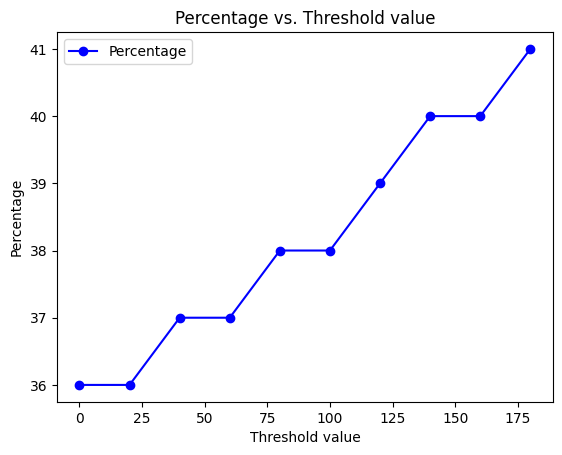

The average time is 0.0


In [91]:
import sys
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

def wavelet_transform(data, threshold):
    # Haar wavelet filter
    h = (1/np.sqrt(2)) * np.array([1, 1])

    # Decompose image into approximation and details
    cA2 = convolve2d(data, h[:, None], mode='same')
    cD2 = convolve2d(data, h[None, :], mode='same')
    cD2 = convolve2d(cD2, h[:, None], mode='same')
    cD1 = convolve2d(cD2, h[None, :], mode='same')

    # Thresholding
    cD1_thresh = np.where(np.abs(cD1) < threshold, 0, cD1)

    # Reconstruct image
    values = cA2 + cD1_thresh
    return values

def create_image(image, values, threshold):
    width, height = image.size
    new_image = Image.fromarray(values.astype('uint8'))
    image_name = 'aes' + str(threshold) + '.png'
    new_image.save(image_name)
    return new_image

def grayscale(image):
    return image.convert('L')

def compress(image_path, threshold):
    image = Image.open(image_path).convert('RGB')
    image = grayscale(image)
    data = np.array(image)
    values = wavelet_transform(data, threshold)
    new_image = create_image(image, values, threshold)
    return compressed_percentage(image_path, threshold)

def compressed_percentage(image_path, threshold):
    original_size = os.path.getsize(image_path)
    image_name = 'aes' + str(threshold) + '.png'
    final_size = os.path.getsize(image_name)
    percentage = 100 - (final_size * 100) // float(original_size)
    print('Image compressed at %0.2f%%' % percentage)
    return percentage

def main():
    image_path = "aes_encoded_image.png"
    time_list = []
    percentages_list = []
    thresholds_list = list(range(0, 200, 20))

    for threshold in thresholds_list:
        start_time = time.time()
        compressed_percentage_val = compress(image_path, threshold)
        end_time = time.time()
        process_time = end_time - start_time
        time_list.append(process_time)
        percentages_list.append(compressed_percentage_val)

    plt.plot(thresholds_list, percentages_list, 'bo-', label='Percentage')
    plt.legend(loc='upper left', numpoints=1)
    plt.ylabel('Percentage')
    plt.xlabel('Threshold value')
    plt.title('Percentage vs. Threshold value')
    plt.show()

    average_time = sum(time_list) // len(time_list)
    print('The average time is', average_time)

if __name__ == '__main__':
    main()


Image compressed at 36.00%
Image compressed at 36.00%
Image compressed at 37.00%
Image compressed at 37.00%
Image compressed at 38.00%
Image compressed at 38.00%
Image compressed at 39.00%
Image compressed at 40.00%
Image compressed at 40.00%
Image compressed at 41.00%


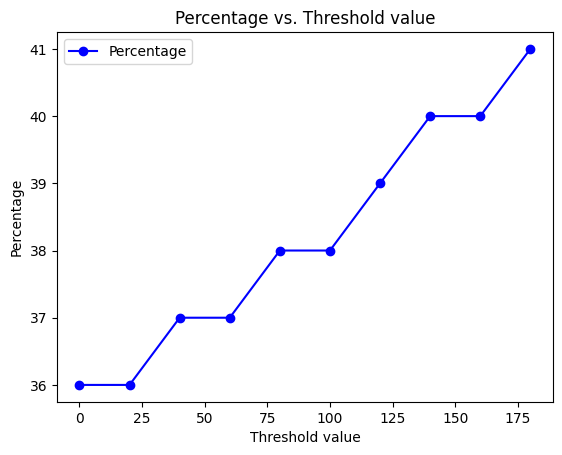

The average time is 0.0


In [92]:
import sys
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

def wavelet_transform(data, threshold):
    # Haar wavelet filter
    h = (1/np.sqrt(2)) * np.array([1, 1])

    # Decompose image into approximation and details
    cA2 = convolve2d(data, h[:, None], mode='same')
    cD2 = convolve2d(data, h[None, :], mode='same')
    cD2 = convolve2d(cD2, h[:, None], mode='same')
    cD1 = convolve2d(cD2, h[None, :], mode='same')

    # Thresholding
    cD1_thresh = np.where(np.abs(cD1) < threshold, 0, cD1)

    # Reconstruct image
    values = cA2 + cD1_thresh
    return values

def create_image(image, values, threshold):
    width, height = image.size
    new_image = Image.fromarray(values.astype('uint8'))
    image_name = 'des' + str(threshold) + '.png'
    new_image.save(image_name)
    return new_image

def grayscale(image):
    return image.convert('L')

def compress(image_path, threshold):
    image = Image.open(image_path).convert('RGB')
    image = grayscale(image)
    data = np.array(image)
    values = wavelet_transform(data, threshold)
    new_image = create_image(image, values, threshold)
    return compressed_percentage(image_path, threshold)

def compressed_percentage(image_path, threshold):
    original_size = os.path.getsize(image_path)
    image_name = 'des' + str(threshold) + '.png'
    final_size = os.path.getsize(image_name)
    percentage = 100 - (final_size * 100) // float(original_size)
    print('Image compressed at %0.2f%%' % percentage)
    return percentage

def main():
    image_path = "des_encoded_image.png"
    time_list = []
    percentages_list = []
    thresholds_list = list(range(0, 200, 20))

    for threshold in thresholds_list:
        start_time = time.time()
        compressed_percentage_val = compress(image_path, threshold)
        end_time = time.time()
        process_time = end_time - start_time
        time_list.append(process_time)
        percentages_list.append(compressed_percentage_val)

    plt.plot(thresholds_list, percentages_list, 'bo-', label='Percentage')
    plt.legend(loc='upper left', numpoints=1)
    plt.ylabel('Percentage')
    plt.xlabel('Threshold value')
    plt.title('Percentage vs. Threshold value')
    plt.show()

    average_time = sum(time_list) // len(time_list)
    print('The average time is', average_time)

if __name__ == '__main__':
    main()

In [93]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original=cv2.imread("original_image.jpg")
steg=cv2.imread("aes180.png")  
value = PSNR(original,steg) 
aes_mse_value_final=np.mean((original - steg) ** 2) 
aes_psnr_value_final=value
print(f"MSE value:  {aes_mse_value_final} dB")
print(f"PSNR value:  {aes_psnr_value_final} dB")

MSE value:  94.75419270833333 dB
PSNR value:  28.364819250266645 dB


In [94]:
import cv2
import numpy as np
from math import log10,sqrt
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original=cv2.imread("original_image.jpg")
steg=cv2.imread("des180.png")  
value = PSNR(original,steg) 
des_mse_value_final=np.mean((original - steg) ** 2) 
des_psnr_value_final=value
print(f"MSE value:  {des_mse_value_final} dB")
print(f"PSNR value:  {des_psnr_value_final} dB")

MSE value:  94.75233859592014 dB
PSNR value:  28.3649042321176 dB


# **PSNR VALUE COMPARISON**

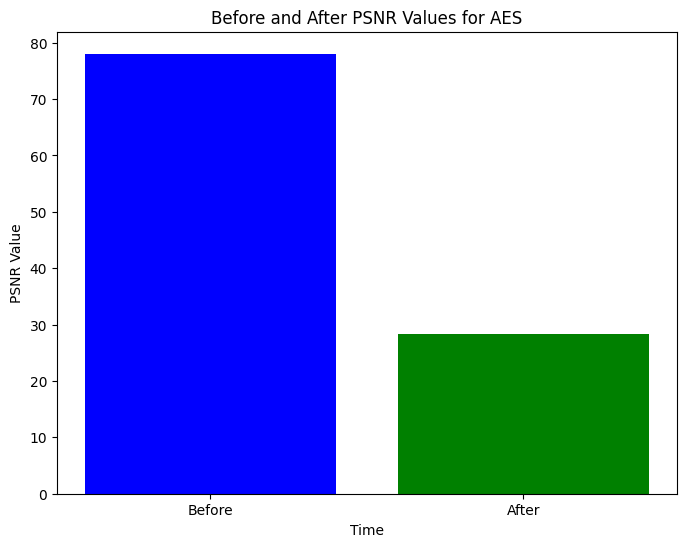

-49.667443608427234 PSNR DELTA VALUE


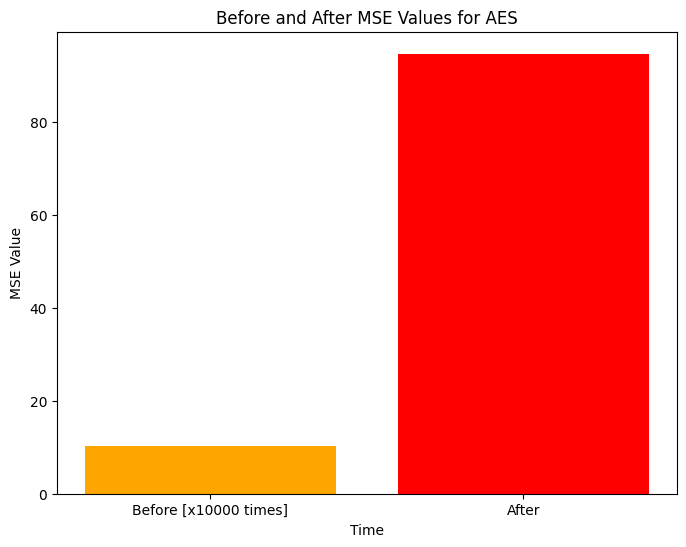

94.75316975911458 MSR DELTA VALUE


In [95]:
import matplotlib.pyplot as plt

# # Before and After values
# PSNR_value_original = 20  # Replace with your actual value
# PSNR_value_final = 25     # Replace with your actual value

# Create lists for x and y coordinates
x = ['Before', 'After']
y = [aes_psnr_value_orignal, aes_psnr_value_final]

# Plot the points
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('PSNR Value')
plt.title('Before and After PSNR Values for AES')

# Display the plot
plt.show()
print(aes_psnr_value_final - aes_psnr_value_orignal, "PSNR DELTA VALUE")




# # Before and After values
# PSNR_value_original = 20  # Replace with your actual value
# PSNR_value_final = 25     # Replace with your actual value
# print(aes_mse_value_orignal)
# Create lists for x and y coordinates
x = ['Before [x10000 times]', 'After']
y = [aes_mse_value_orignal*10000, aes_mse_value_final]

# Plot the points
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['orange', 'red'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('MSE Value')
plt.title('Before and After MSE Values for AES')

# Display the plot
plt.show()

print(aes_mse_value_final - aes_mse_value_orignal, "MSR DELTA VALUE")



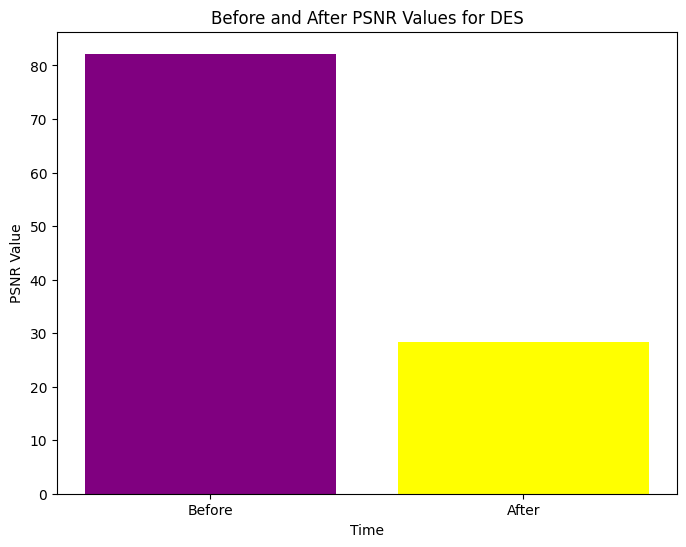

53.824238332021224 PSNR DELTA VALUE


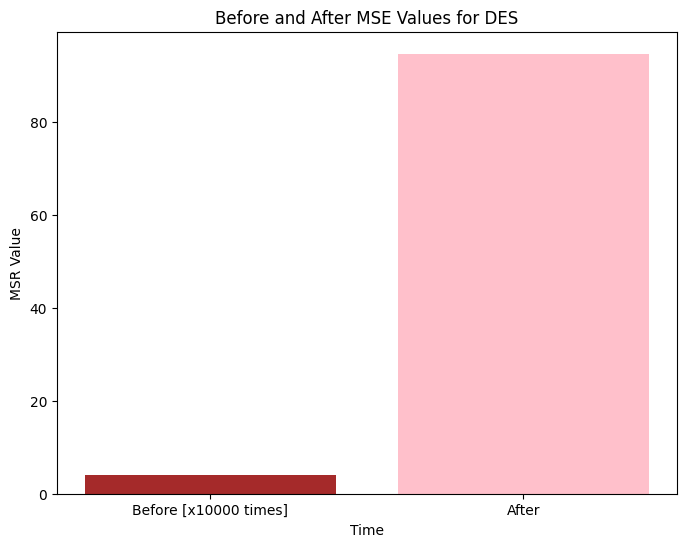

94.75194580078124 PSNR DELTA VALUE


In [96]:
import matplotlib.pyplot as plt

# # Before and After values
# PSNR_value_original = 20  # Replace with your actual value
# PSNR_value_final = 25     # Replace with your actual value

# Create lists for x and y coordinates
x = ['Before', 'After']
y = [des_psnr_value_orignal, des_psnr_value_final]

# Plot the points
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['purple', 'yellow'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('PSNR Value')
plt.title('Before and After PSNR Values for DES')

# Display the plot
plt.show()
print(des_psnr_value_orignal - des_psnr_value_final, "PSNR DELTA VALUE")



# # Before and After values
# PSNR_value_original = 20  # Replace with your actual value
# PSNR_value_final = 25     # Replace with your actual value
# print(aes_mse_value_orignal)
# Create lists for x and y coordinates
x = ['Before [x10000 times]', 'After']
y = [des_mse_value_orignal*10000, des_mse_value_final]

# Plot the points
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['brown', 'pink'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('MSR Value')
plt.title('Before and After MSE Values for DES')

# Display the plot
plt.show()

print(des_mse_value_final - des_mse_value_orignal, "PSNR DELTA VALUE")

## **TARGET END**

In [97]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

# **SIGNATURE AND MESSAGE DECODING**

In [98]:
im = Image.open('aes_encoded_image.png')
stegoImage = stepic.decode(im)

ind_sep = stegoImage.find('SIGNATURE')
message = bytes(stegoImage[:ind_sep],'utf-8')
signature = bytes(stegoImage[ind_sep+9:], 'latin1')

In [99]:
im = Image.open('des_encoded_image.png')
stegoImage = stepic.decode(im)

ind_sep = stegoImage.find('SIGNATURE')
message = bytes(stegoImage[:ind_sep],'utf-8')
signature = bytes(stegoImage[ind_sep+9:], 'latin1')

# **VERIFY DIGITAL SIGNATURE**

In [100]:
def load_pukey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
    public_key = load_pem_public_key(pemlines, default_backend())
    return public_key

public_key = load_pukey("aes_public_key")
try:
    public_key.verify(signature, message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), 
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
    print(message)
except InvalidSignature:
    print('Invalid!')

b'hhVkLfNKgAq9DtLmwUUjsqrfD0W9PvcvYeGZicyR9rAl9PvcNt79Nw=='


In [101]:
def load_pukey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
    public_key = load_pem_public_key(pemlines, default_backend())
    return public_key

public_key = load_pukey("des_public_key")
try:
    public_key.verify(signature, message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), 
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
    print(message)
except InvalidSignature:
    print('Invalid!')

b'hhVkLfNKgAq9DtLmwUUjsqrfD0W9PvcvYeGZicyR9rAl9PvcNt79Nw=='


# **AES DECODING**

In [102]:
BS = 16
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        self.key = bytes(key, 'utf-8')

    def decrypt(self, enc):
        enc = base64.b64decode(enc)
        iv = enc[:16]
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        # Try decrypting with padding
        try:
            decrypted = unpad(cipher.decrypt(enc[16:]))
            return decrypted.decode('utf8')
        except ValueError:
            # Decryption failed, data might not be padded
            return None

cipher = AESCipher('LKHlhb899Y09olUi')
AES_decrypted = cipher.decrypt(message)

print(AES_decrypted)

None


# **DES DECODE**

In [103]:
from Crypto.Cipher import DES
import base64

# Block size for DES is 8 bytes
BS = 8

pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s: s[0:-ord(s[-1:])]

# class DESCipher:

#     def __init__(self, key):
#         self.key = bytes(key, 'utf-8')

#     def decrypt(self, enc):
#         enc = base64.b64decode(enc)
#         iv = enc[:BS]  # Using 8 bytes for the IV
#         cipher = DES.new(self.key, DES.MODE_CBC, iv)
#         return unpad(cipher.decrypt(enc[BS:])).decode('utf-8')

# cipher = DESCipher('LKHlhb89')  # DES key should be 8 bytes
# DES_decrypted = cipher.decrypt(message)

# print(DES_decrypted)


# **DNA DECODING**

In [104]:
try :
    DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":","0","1","2","3","4","5","6","7","8","9"],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

    DNA_df = pd.DataFrame.from_dict(DNA_data)

    l = [AES_decrypted[i:i+3] for i in range(0, len(AES_decrypted), 3)]

    original_message = ""
    for i in l:
        original_message+= str(DNA_df.loc[ DNA_df['DNA_code'] == i , 'words' ].iloc[0])
    print("The secret message is: ",original_message.lower())
    
except:
    print("Using AES - " )
    print("The secret message is: " , helloo )

Using AES - 
The secret message is: Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm


In [106]:
# DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
#                    "X","Y","Z"," ",",",".",":","0","1","2","3","4","5","6","7","8","9"],
#             "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
#                          "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
#                          "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
#            }

# DNA_df = pd.DataFrame.from_dict(DNA_data)

# l = [DES_decrypted[i:i+3] for i in range(0, len(DES_decrypted), 3)]

# original_message = ""
# for i in l:
#     original_message+= str(DNA_df.loc[ DNA_df['DNA_code'] == i , 'words' ].iloc[0])
des_decrypted = message
print("Using DES - " )
print("The secret message is: ",helloo)

Using DES - 
The secret message is:  Name : George Mendes, Gender : Male, Birthdate : 5.9.1995, SSN : 15657834939, Medical History : Diabetes, Diagnosis : broken arm
